## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Perceptron liniowy

Klasyfikacja jest dziedziną bardzo popularną i istnieje wiele różnych algorytmów uczenia maszynowego, które służą do rozwiązywania problemów klasyfikacji. My przyjrzymy się działaniu podstawowego algorytmu, jednak jego dobre zrozumienie jest kluczowe do pojęcia bardziej zaawansowanych metod. 

Perceptron, bo o nim będzie mowa w tym notatniku, używany jest do klasyfikacji binarnej. Posiada duże ograniczenie, które mówi, że algorytm jest zbieżny w skończonej liczbie kroków, jeśli zbiór danych jest liniowo separowalny. Co oznacza, że zbiór jest liniowo separowalny? Że próbki należące do różnych klas można oddzielić za pomocą prostej w przypadku dwuwymiarowym, płaszczyzny w przypadku trójwymiarowym i hiperpłaszczyzny w przypadku $N$-wymiarowym.

Spójrzmy jeszcze raz na ankietę prezentującą podział na płeć ze względu na wzrost i wagę.

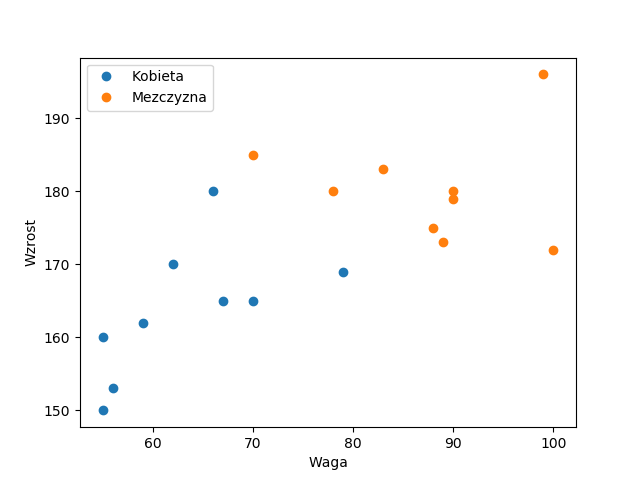

Czy ten zbiór jest liniowo separowalny? Jest, ponieważ jesteśmy w stanie narysować wiele różnych prostych, które oddzielają kobiety od mężczyzn. Zadanie perceptronu właśnie na tym polega, aby znaleźć prostą (w najprostszym przypadku), która oddziela od siebie dwie klasy i na podstawie stworzonego podziału klasyfikować nowe próbki.


### Budowa sztucznego neuronu

Perceptron został stworzony na bazie sztucznego neuronu. Twórcami modelu sztuczego neuronu byli McCulloch i Pitts, którzy w roku 1943 zainspirowani działaniem biologicznego neuronu, zaproponowali jego budowę.


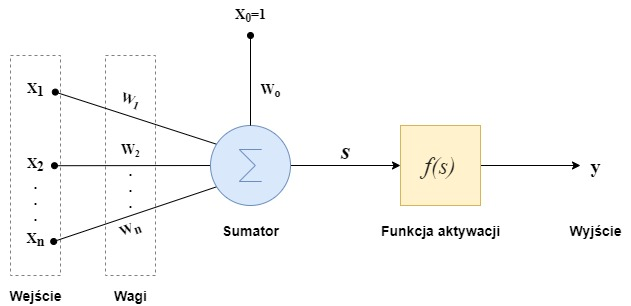

Sztuczny neuron składa się na następujących elementów:

* **Wejście** - warstwa odpowiadająca za przyjmowanie danych wejściowych. Istnieje tyle połączeń do neuronu, ile jest cech w zestawie danych. Przykładowo, jeśli chcemy rozpoznawać płeć na podstawie wagi, wzrostu, długości stopy i długości włosów, to mamy 4 cechy opisujące osobę, więc będą 4 połączenia w warstwie wejściowej.


* **Wagi** - każde połączenie do neuronu ma skojarzoną ze sobą wagę. Wagi są tym, czym były współczynniki regresji w algorytmie regresji. Tutaj przechowywana jest "wiedza" neuronu.


* **Sumator** - element, który odpowiada za zsmumowanie wszystkich iloczynów wejść i wag. Jest to tak zwane pobudzenie neuronu, czyli ważona suma wejść. Do sumatora wchodzi jeszcze jedno dodatkowe połączenie. Na jego wejściu zawsze podawana jest wartość $1$, a waga skojarzona z tym wejściem nazywana jest biasem. Odpowiada ona za przesunięcia prostej separującej klasy. Gdyby jej nie było, prosta ta zawsze przechodziłaby przez początek układu współrzędnych.  


* **Funkcja aktywacji** - pobudzenie neuronu obliczone w sumatorze trafia następnie do funkcji aktywacji. To ona decyduje o zachowaniu neuronu, czyli o jego odpowiedzi. Istnieje wiele różnych funkcji aktywacji, my początkowo wykorzystamy skokową funkcję aktywacji Heaviside’a:

$$ f(s) = \left\{\begin{array}{l}
1, \quad s \geq 0,\\
0, \quad s<0\end{array}\right.$$


* **Wyjście** - odpowiedź neuronu, czyli przetworzona przez funkcje aktywacji ważona suma wejść. W przypadku klasyfikacji binarnej będzie to wartość $0$ lub $1$.

Neuron, który będziemy implementować, ze względu na metodę trenowania i wybraną funkcję aktywacji nazywany jest **perceptronem**. Wzór matematyczny opisujący powyższą budowę perceptronu jest następujący:

$$h_w(x) = f\left(\sum_{i=0}^{n}{w_ix_i}\right)$$

Zgodnie z notacją zaproponowaną przez Prof. Andrew Ng, funkcje, które mapują obserwacje na wynik będziemy nazywać hipotezami (_ang. hypothesis_) i oznaczać jako $h_w(x)$. 
Proszę zauważyć, że we wzorze został uwzględniony bias, czyli waga $w_0$. Na wejście $x_0$ zawsze podawana jest wartość $1$.


### Nauka perceptronu

Istnieją różne metody treningu sztucznego neuronu. Ten, który zaimplementujemy wykorzystywał będzie regułę perceptronową. To prosta metoda, która służy do aktualizacji wag w neuronie ze skokową funkcją aktywacji. Wszystkie wagi perceptronu aktualizowane są jednocześnie po każdej próbce uczącej. Reguła perceptronowa może zostać zapisana jako:

$$
w_{i}=\begin{cases}
w_i,                    &  \ h_w(x^{(k)}) = y^{(k)},\\
w_i + \alpha x_i^{(k)}, &  \ h_w(x^{(k)}) < y^{(k)},\\
w_i - \alpha x_i^{(k)}, &  \ h_w(x^{(k)}) > y^{(k)}
\end{cases}
$$

Gdzie: 
* $y^{(k)}$ jest oczekiwaną odpowiedzą perceptronu (klasą dla $k$-tej próbki uczącej)
* $\alpha$ jest współczynnikiem uczenia i przybiera wartości z przedziału $(0,1)$.

Pamiętajmy, że $h_w(x)$ i $y$ mogą przyjąć tylko wartości $0$ lub $1$. W takim przypadku wszystkie możliwe kombinacje aktualizacji wag wyglądają następująco:

| h_w(x) | y |     aktualizacja wag     |
|:------:|:-:|:------------------------:|
|    0   | 0 |         bez zmian        |
|    0   | 1 | $w_i + \alpha x_i^{(k)}$ |
|    1   | 0 | $w_i - \alpha x_i^{(k)}$ |
|    1   | 1 |         bez zmian        |

Czyli jeśli odpowiedź perceptronu była $0$, a rzeczywista wartość wyniosła $1$, to musimy zwiększyć wagi, aby pobudzenie neuronu miało większą wartość. Jeśli odpowiedź perceptronu była $1$, a rzeczywista wartość $0$, to musimy zmniejszyć wagi, by pobudzenie neuronu miało mniejszą wartość. W pozostałych przypadkach odpowiedzi się zgadzają, więc nie aktualizujemy wag. Dzięki temu prostemu algorytmowi, perceptron zawsze znajdzie prostą separującą klasy w liniowo separowalnym zestawie danych.


### Algorytm perceptronu

Mając już wszystkie potrzebne informacje o działaniu perceptronu, zapiszmy algorytm.

1. Wygenerowanie początkowych wag perceptronu,
2. Wybranie $k$ - tej próbki uczącej ze zbioru danych
3. Obliczenie ważonej sumy wejść dla $k$-tej próbki uczącej,
4. Oblicznie odpowiedzi neuronu poprzez funkcję aktywacji Heaviside’a,
5. Aktualizacja wag zgodnie z regułą perceptronową,
6. Powrót do kroku 2 jeśli k < N, a N to liczba wszystkich próbek uczących,
7. Przerwanie uczenia, jeśli perceptron rozpoznaje wszystkie próbki prawidłowo lub jego błąd mieści się w ustalonym zakresie. W przeciwnym wypadku, ustawienie na k = 0 i powrót do kroku 2.

Przejście przez wszystkie próbki uczące w zestawie danych nazywane jest epoką. Punkt 7 mówi o tym, że jeśli wszystkie próbki w epoce zostały dobrze sklasyfikowane, to możemy przerwać uczenie. Ilość epok potrzebna do treningu perceptronu jest zależna od współczynnika uczenia $\alpha$ oraz od zestawu danych. W zestawach danych, które nie są liniowo separowalne, perceptron nigdy nie będzie miał stuprocentowej skuteczności klasyfikacji. W takich przypadkach dobrze jest zabezpieczyć algorytm przed nieskończonym procesem uczenia.


### Granica decyzyjna

Wiadomo już, że zadaniem perceptronu jest oddzielenie próbek z przeciwnych klas. Prosta, która oddziela próbki z różnych klas nazywana jest granicą decyzyjną. Przed przejściem do implementacji, warto wyrobić sobie pewną intuicję, co to tak naprawdę to oznacza i dlaczego perceptron w ogóle działa.

Załóżmy, że mamy zbiór danych z dwoma cechami $x_1$ i $x_2$. Zbiór ten jest liniowo separowalny. 

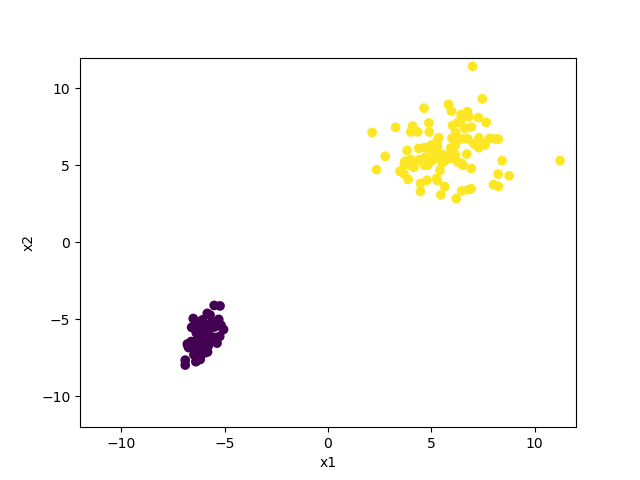
    

W naszym przypadku wzór perceptronu dla dwóch cech wygląda następująco: 

$$h_w(x) = f(w_0x_0 + w_1x_1 + w_2x_2)$$

Spójrzmy jeszcze jak wygląda wykres naszej funkcji aktywacji Heaviside’a, która decyduje o odpowiedzi perceptronu.

<div>
    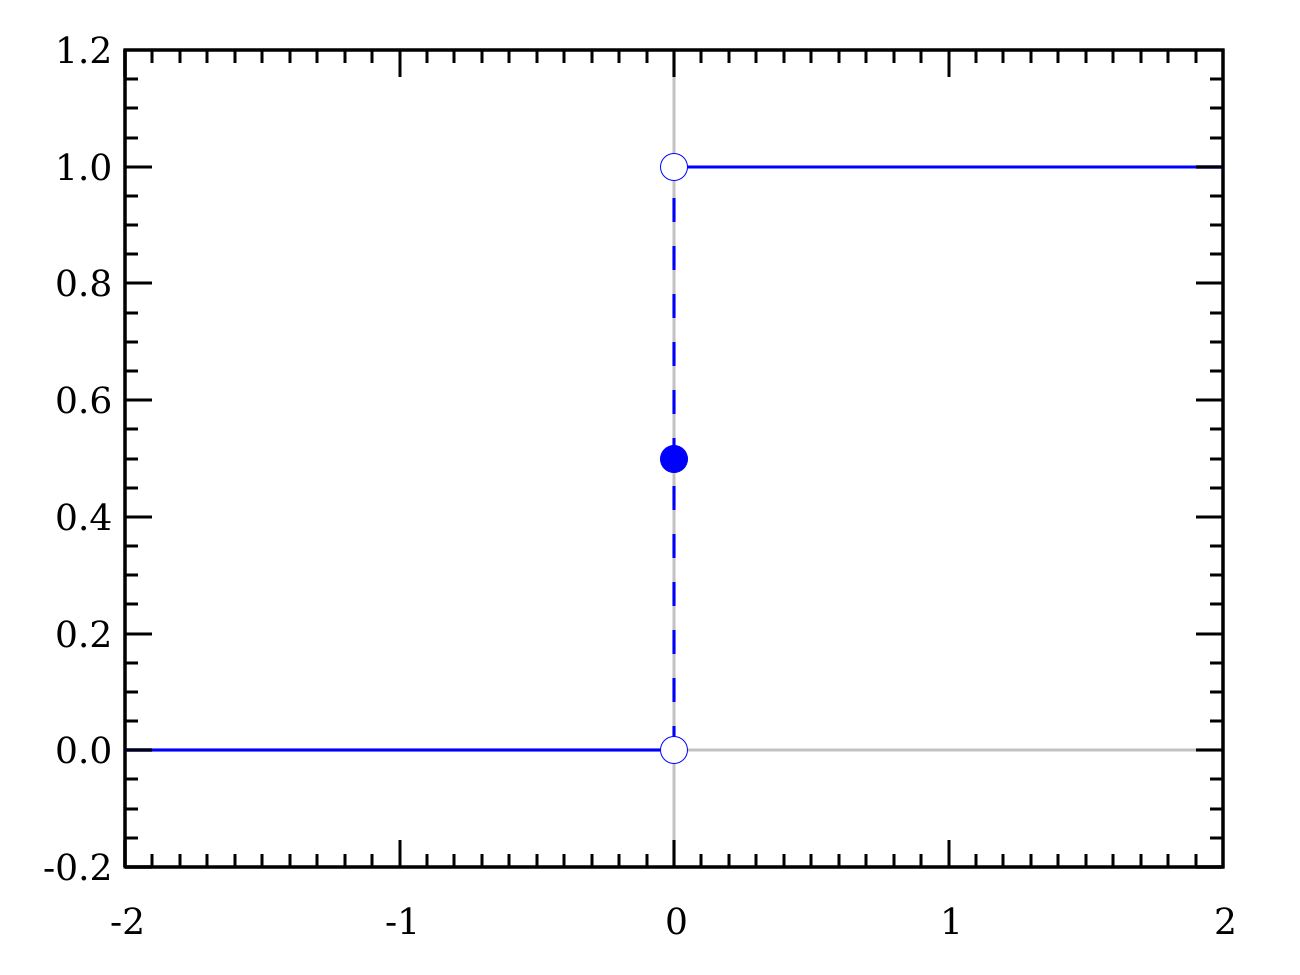
</div>

Analizując wykres, można zauważyć, że odpowiedź $0$ będzie w sytuacji, gdy wartość wchodząca do funkcji aktywacji będzie ujemna, a gdy będzie dodatnia, to odpowiedź będzie równa $1$. Dobrze, czyli wiemy, że żeby perceptron dał predykcję $1$, to ważona suma wejść musi być większa od zera, w przeciwnym przypadku da odpowiedź $0$. Zapiszmy to.

$h_w(x) = 1$ jeśli

$$w_0x_0 + w_1x_1 + w_2x_2 > 0$$ 

$h_w(x) = 0$ jeśli 

$$w_0x_0 + w_1x_1 + w_2x_2 < 0$$ 

Czyli wynika z tego, że zmiana decyzji predykcji jest wtedy, gdy ważona suma będzie równa $0$. Wykres funkcji aktywacji to potwierdza.

$$w_0x_0 + w_1x_1 + w_2x_2 = 0$$


Załóżmy, że za pomocą algorytmu perceptronu znaleźliśmy następujące wartości wag: $[-3, 1, 1]$. Podstawmy te wartości do równania.

$$-5 + 1x_1 + 1x_2 = 0$$ 

Pamiętamy, że $x_0$ ma zawsze wartość $1$, więc pomijamy je w równaniu. Teraz przekształćmy równanie tak, aby po lewej stronie były niewiadome.

$$x_1 + x_2 = 5$$ 
$$x_2 = -x_1 + 5$$

To co otrzymaliśmy, to równanie prostej o współczynniku kierunkowym $-1$. Prosta ta przetnie oś $x_2$ w punkcie $(0,5)$, a oś $x_1$ w punkcie $(5,0)$. Nanieśmy prostą na nasz wykres z zestawem danych.

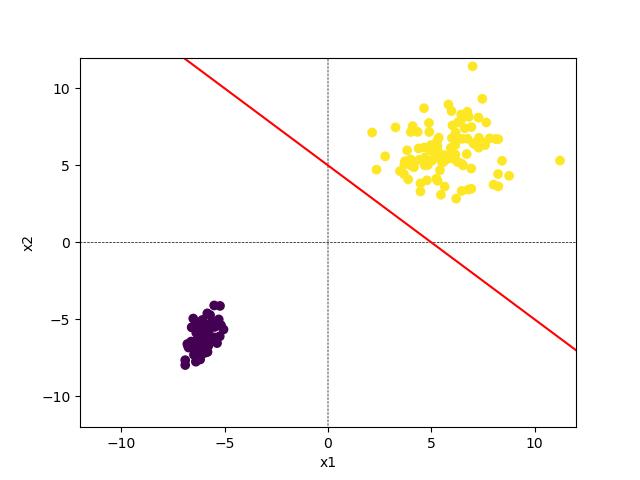

Prosta, którą nanieśliśmy na wykres, to **granica decyzyjna** (ang. decision boundary). Jest to miejsce miejsce, w którym następuje zmiana predykcji. Wszystkie próbki, które znajdą się poniżej prostej będą zaklasyfikowane jako klasa $0$, a te powyżej, jako klasa $1$.


### Zadanie 1

W pliku o nazwie Ankieta.csv zajdują się dane z omawianej wcześniej ankiety. Każdy rekord zawiera informacje o wzroście oraz wadze, a ostatnią kolumną jest płeć. Przygotuj algorym perceptronu, który będzie skutecznie klasyfikował próbki znajdujące się w zestawie danych. Sugerowane jest stworzenie ogólnej implementacji perceptronu, który będzie w stanie rozwiązać problem dla dowolnej ilości cech w zestawie danych. 

_Uwaga: w zbiorze danych Ankieta.csv kolumna "Plec" ma wartości tekstowe. Przed implementacją konieczne jest przemapowanie ich do postaci liczbowej. Np. Kobieta - 1, Mezczyzna - 0._

In [19]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import sys

original_df = pd.read_csv('Ankieta.csv', sep=',')
df = original_df.sort_values(by=['Waga'])
df['x_0'] = 1

df.loc[df['Plec'] == 'Mezczyzna', 'Plec'] = 0
df.loc[df['Plec'] == 'Kobieta', 'Plec'] = 1

x_0 = df['x_0'].values.reshape(df['x_0'].shape[0], 1)
x = df['Waga'].values.reshape(df['Waga'].shape[0], 1)
y = df['Wzrost'].values.reshape(df['Wzrost'].shape[0], 1)
z = df['Plec'].values.reshape(df['Plec'].shape[0], 1)

def activation_function(total_sum):
    if total_sum >= 0:
        return 1
    else:
        return 0
    
def sumator(X, weights, record_row):
    local_sum = 0
    for j in range(len(X)):
        local_sum = local_sum + X[j][record_row] * weights[j][-1]
    
    return local_sum

def count_new_weight(X, weights, alpha, record_row, addOrSubtract):
    new_weight = 0
    for j in range(len(weights)):
        if addOrSubtract == True:
            weights[j].append(weights[j][-1] + alpha*X[j][record_row])
        else:
            weights[j].append(weights[j][-1] - alpha*X[j][record_row])

def perceptron(*X, z, alpha, weights_start_value):
    weights = [[weights_start_value] for i in range(len(X))]
    lowest_number_of_misclassifications = sys.maxsize
    
    iteration = 1
    while True:
        number_of_misclassifications = 0
                
        for record_row in range(len(z)):
            temp_sum = 0
            temp_sum = sumator(X, weights, record_row)
                
            if activation_function(temp_sum) == 0 and z[record_row] == 1:
                count_new_weight(X, weights,  alpha, record_row, True)
                number_of_misclassifications += 1
            
            
            if (activation_function(temp_sum) == 1 and z[record_row] == 0):
                count_new_weight(X, weights, alpha, record_row, False)
                number_of_misclassifications += 1
        
        if lowest_number_of_misclassifications > number_of_misclassifications:
            lowest_number_of_misclassifications = number_of_misclassifications
             
        print(f'iteration: {iteration} Number of Misclassifications: {lowest_number_of_misclassifications}')   
        iteration += 1
        
        if number_of_misclassifications == 0:
            break       
        
    return weights
        

counted_weights = perceptron(x_0, x, y, z=z, alpha=0.1, weights_start_value=1000)
print(f'w0: {counted_weights[0][-1]} w1: {counted_weights[1][-1]} w2: {counted_weights[2][-1]}')

iteration: 1 Number of Misclassifications: 9
iteration: 2 Number of Misclassifications: 9
iteration: 3 Number of Misclassifications: 9
iteration: 4 Number of Misclassifications: 9
iteration: 5 Number of Misclassifications: 9
iteration: 6 Number of Misclassifications: 9
iteration: 7 Number of Misclassifications: 9
iteration: 8 Number of Misclassifications: 6
iteration: 9 Number of Misclassifications: 6
iteration: 10 Number of Misclassifications: 6
iteration: 11 Number of Misclassifications: 6
iteration: 12 Number of Misclassifications: 6
iteration: 13 Number of Misclassifications: 6
iteration: 14 Number of Misclassifications: 6
iteration: 15 Number of Misclassifications: 6
iteration: 16 Number of Misclassifications: 6
iteration: 17 Number of Misclassifications: 6
iteration: 18 Number of Misclassifications: 6
iteration: 19 Number of Misclassifications: 6
iteration: 20 Number of Misclassifications: 6
iteration: 21 Number of Misclassifications: 6
iteration: 22 Number of Misclassifications:

### Zadanie 2

Stwórz wykres przedstawiający dane z pliku Ankieta.csv w dwuwymiarowej przestrzeni wraz z granicą decyzyjną obliczoną w poprzednim zadaniu. Dodatkowo, stwórz animację przedstawiającą jak zmieniała się granica decyzyjna po każdej próbce na przestrzeni epok.

w0 = [1001.3]
w1 = [-2.7]
w2 = [-4.5]
1238
Animation is being created
Animation created


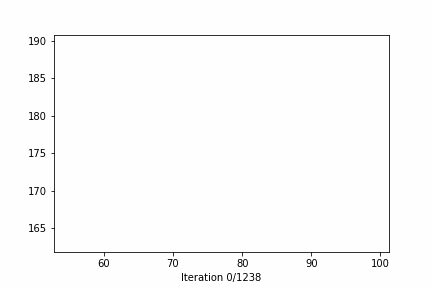

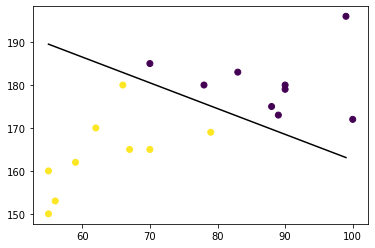

In [18]:
from pylab import meshgrid, imshow
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# np.seterr(divide='ignore', invalid='ignore')

xx = np.arange(min(x),max(x),1)

plt.scatter(x, y, c=z)

yy = (-counted_weights[1][-1]*xx -counted_weights[0][-1])/counted_weights[2][-1]

plt.plot(xx, yy, 'k-')
counter = 0
for i in counted_weights:
    print(f'w{counter} = {i[-1]}')
    counter+=1
print(len(counted_weights[0]))
fig, ax = plt.subplots()
line, = ax.plot(xx, (-counted_weights[1][-1]*xx -counted_weights[0][-1])/counted_weights[2][-1], 'r-', linewidth=2)
def update(i):
    line.set_ydata((-counted_weights[1][i]*xx -counted_weights[0][i])/counted_weights[2][i])
    ax.set_xlabel(f'Iteration {i}/{len(counted_weights[0])}')
    return line,

print('Animation is being created')
anim = FuncAnimation(fig, update, frames=np.arange(0, len(counted_weights[0]), 10), interval=1)
plt.close(anim._fig)
anim.save('temp.gif', writer=animation.PillowWriter())

print('Animation created')
with open('temp.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

### Zadanie 3

Wykorzystaj stworzony algorym w celu znalezienia granicy decyzyjnej będącej płaszczyzną w trójwymiarowej przestrzeni. Zbiór danych znajduje się w pliku o nazwie 3D_perceptron.csv. Stwórz wykres analogicznie jak w zadaniu 2, animacja nie jest wymagana.

iteration: 1 Number of Misclassifications: 200
iteration: 2 Number of Misclassifications: 200
iteration: 3 Number of Misclassifications: 200
iteration: 4 Number of Misclassifications: 200
iteration: 5 Number of Misclassifications: 200
iteration: 6 Number of Misclassifications: 200
iteration: 7 Number of Misclassifications: 200
iteration: 8 Number of Misclassifications: 200
iteration: 9 Number of Misclassifications: 200
iteration: 10 Number of Misclassifications: 200
iteration: 11 Number of Misclassifications: 200
iteration: 12 Number of Misclassifications: 200
iteration: 13 Number of Misclassifications: 200
iteration: 14 Number of Misclassifications: 200
iteration: 15 Number of Misclassifications: 200
iteration: 16 Number of Misclassifications: 200
iteration: 17 Number of Misclassifications: 200
iteration: 18 Number of Misclassifications: 200
iteration: 19 Number of Misclassifications: 200
iteration: 20 Number of Misclassifications: 200
iteration: 21 Number of Misclassifications: 200
i

iteration: 178 Number of Misclassifications: 1
iteration: 179 Number of Misclassifications: 1
iteration: 180 Number of Misclassifications: 1
iteration: 181 Number of Misclassifications: 1
iteration: 182 Number of Misclassifications: 1
iteration: 183 Number of Misclassifications: 1
iteration: 184 Number of Misclassifications: 1
iteration: 185 Number of Misclassifications: 1
iteration: 186 Number of Misclassifications: 1
iteration: 187 Number of Misclassifications: 1
iteration: 188 Number of Misclassifications: 1
iteration: 189 Number of Misclassifications: 1
iteration: 190 Number of Misclassifications: 1
iteration: 191 Number of Misclassifications: 1
iteration: 192 Number of Misclassifications: 1
iteration: 193 Number of Misclassifications: 1
iteration: 194 Number of Misclassifications: 1
iteration: 195 Number of Misclassifications: 1
iteration: 196 Number of Misclassifications: 1
iteration: 197 Number of Misclassifications: 1
iteration: 198 Number of Misclassifications: 1
iteration: 19

iteration: 386 Number of Misclassifications: 1
iteration: 387 Number of Misclassifications: 1
iteration: 388 Number of Misclassifications: 1
iteration: 389 Number of Misclassifications: 1
iteration: 390 Number of Misclassifications: 1
iteration: 391 Number of Misclassifications: 1
iteration: 392 Number of Misclassifications: 1
iteration: 393 Number of Misclassifications: 1
iteration: 394 Number of Misclassifications: 1
iteration: 395 Number of Misclassifications: 1
iteration: 396 Number of Misclassifications: 1
iteration: 397 Number of Misclassifications: 1
iteration: 398 Number of Misclassifications: 1
iteration: 399 Number of Misclassifications: 1
iteration: 400 Number of Misclassifications: 1
iteration: 401 Number of Misclassifications: 1
iteration: 402 Number of Misclassifications: 1
iteration: 403 Number of Misclassifications: 1
iteration: 404 Number of Misclassifications: 1
iteration: 405 Number of Misclassifications: 1
iteration: 406 Number of Misclassifications: 1
iteration: 40

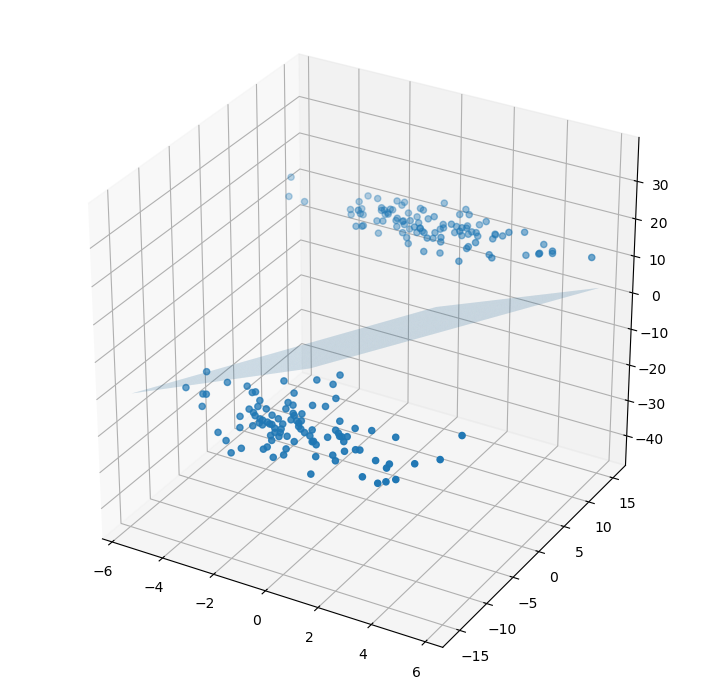

In [20]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

df = pd.read_csv('3D_perceptron.csv', sep=',')
df['x0'] = 1


x0 = df['x0'].values.reshape(df['x0'].shape[0], 1)
x1 = df['x1'].values.reshape(df['x1'].shape[0], 1)
x2 = df['x2'].values.reshape(df['x2'].shape[0], 1)
x3 = df['x3'].values.reshape(df['x3'].shape[0], 1)
y = df['y'].values.reshape(df['y'].shape[0], 1)

counted_weights = perceptron(x0, x1, x2, x3, z=y, alpha=0.001, weights_start_value=-100)

counter = 0
for i in counted_weights:
    print(f'w{counter} = {i[-1]}')
    counter += 1

x_min = min(x1)
x_max = max(x1)

x_temp = np.linspace(x_min, x_max, 100)

y_min = min(x2)
y_max = max(x2)

y_temp = np.linspace(y_min, y_max, 100)

Xs,Ys = np.meshgrid(x_temp,y_temp)
Zs = (counted_weights[0][-1] - counted_weights[1][-1]*Xs - counted_weights[2][-1]*Ys) / counted_weights[3][-1]

#visualize 3d scatterplot with hyperplane
fig = plt.figure(num=None, figsize=(9, 9), dpi=100, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')

ax.plot_surface(Xs, Ys, Zs, alpha=0.2)

ax.scatter(x1, x2, x3)